## Water properties
Consider water at a temperature $T = 200^\circ$C and pressure $p = 150$ kPa.

Determine: 
- (a) Its state.
- (b) Its specific volume.
- (c) Its internal energy.

In [4]:
T1_C = 200
p1_kPa = 150

# conversion 
p1_MPa = p1_kPa/1000
T1_K = T1_C + 273.15

### Solution
We can use the property tables in the book to determine the answers or we can use "digital" tables. Here we will use the digital tables. 

In [5]:
!pip install pyCalor

In [6]:
from pyCalor import thermo as th

In order to calculate a thermodynamic property, we need to define several properties, such as temperature $T$ and pressure $p$, and for vapor-liquid mixtures, the quality $x$. $T$ should be in the units Kelvin, $p$ should be in MPa, and $x$ should be between 0 and 1.

We then have enough information to calculate all of the thermodynamic properties at this state. The first step in determining properties like $p$, specific entropy $s$, specific enthalpy $h$, etc., is to use the `pyCalor` module. This is written in this case as:

In [30]:
water = th.state('Water', p=p1_kPa, T=T1_K, name="1")

From this, we can now calculate $s_1$ (kJ/(kg K)), $h_1$ (kJ/kg), and specific volume $v_1$ (m$^3$/kg).

In [8]:
s1 = water.s # kJ/kg*K
h1 = water.h # kJ/kg
v1 = water.v # m3/kg
u1 = water.u # kJ/kg

In [9]:
print('The specific entropy is: {0:1.4f} kJ/kg*K'.format(s1))
print('The specific enthalpy is: {0:1.4f} kJ/kg'.format(h1))
print('The specific volume is: {0:1.4f} m3/kg'.format(v1))
print('The specific internal energy is: {0:1.4f} kJ/kg'.format(u1))

The specific entropy is: 7.6447 kJ/kg*K
The specific enthalpy is: 2873.1053 kJ/kg
The specific volume is: 1.4445 m3/kg
The specific internal energy is: 2656.4326 kJ/kg


In [11]:
import numpy as np
import matplotlib.pyplot as plt

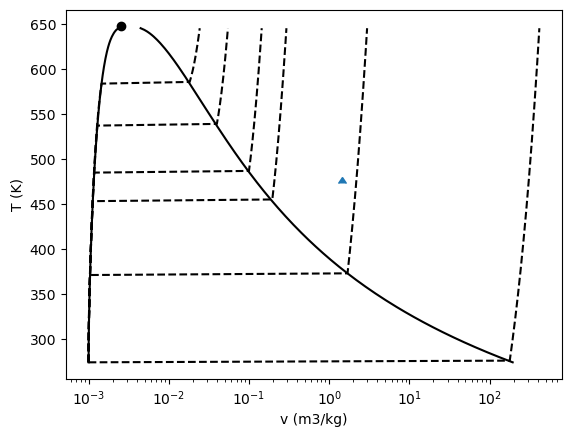

In [12]:
plt.figure()
plt.clf()

Tc_K = 647.1 
pc_Pa = 22.1e6

Ttp_K = 273.16
ptp_Pa = 611.6

stcritical = th.state('Water', p=pc_Pa/1e3, T=Tc_K, name="1")

plt.xscale("log")
plt.plot(stcritical.v,stcritical.T, marker = "o", color="black")

T = np.linspace(274, 372+273, 200) # range of temperatures
for P in [(ptp_Pa+100)/1e6, 0.1, 1, 2, 5, 10]: #MPa
    steam = [th.state('Water', p=P*1e3, T=t) for t in T]
    # S = [s.s for s in steam]
    v = [s.v for s in steam]
    plt.xscale("log")
    plt.plot(v, T, 'k--')

# saturated vapor and liquid lines
vvap = [s.v for s in [th.state('Water', x=1, T=t) for t in T]]
vliq = [s.v for s in [th.state('Water', x=0, T=t) for t in T]]

plt.xscale("log")
plt.plot(vvap, T, 'k-')
plt.xscale("log")
plt.plot(vliq, T, 'k-')

plt.xscale("log")
plt.plot(v1,T1_K, marker = 10)

plt.xlabel('v (m3/kg)')
plt.ylabel('T (K)')
plt.savefig('iawps-steam-T-v-diagram.png')

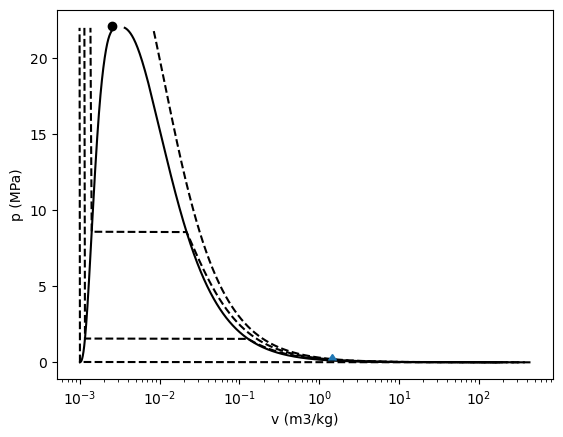

In [19]:
plt.figure()
plt.clf()
Tc_K = 647.1 
pc_Pa = 22.1e6

Ttp_K = 273.16
ptp_Pa = 611.6

stcritical = th.state('Water', p=pc_Pa/1e3, T=Tc_K, name="1")

plt.xscale("log")
plt.plot(stcritical.v,stcritical.P/1000, marker = "o", color="black")

P = np.linspace(700/1e6, 22, 1000) # range of pressures
for T in [Ttp_K+5, T1_K, T1_K+100, T1_K+200]: #K
    st = [th.state('Water', p=p*1e3, T=T) for p in P]
    v = [s.v for s in st]
    plt.xscale("log")
    plt.plot(v, P, 'k--')

vvap = [s.v for s in [th.state('Water', x=1, p=p*1e3) for p in P]]
vliq = [s.v for s in [th.state('Water', x=0, p=p*1e3) for p in P]]

plt.plot(vvap, P, 'k-')
plt.plot(vliq, P, 'k-')

plt.xscale("log")
plt.plot(v1,p1_MPa, marker = 10)

plt.xlabel('v (m3/kg)')
plt.ylabel('p (MPa)')
plt.savefig('iawps-steam-p-v-diagram.png')

Based on the plots above, we can see that water is in a vapor state.

Let's now consider water in a saturated vapor state at $T=80^\circ$. When we have a saturated vapor, the vapor quality, $x$, is equal to 1.

In [20]:
T2_C = 80
T2_K = T2_C+273.15
x = 1 # saturated vapor

In [23]:
saturatedVapor = th.state('Water', x=x, T=T2_K)

In [24]:
s2 = saturatedVapor.s # kJ/kg*K
h2 = saturatedVapor.h # kJ/kg
v2 = saturatedVapor.v # m3/kg
u2 = saturatedVapor.u # kJ/kg
p2 = saturatedVapor.P # kPa

In [25]:
print('The specific entropy is: {0:1.4f} kJ/kg*K'.format(s2))
print('The specific enthalpy is: {0:1.4f} kJ/kg'.format(h2))
print('The specific volume is: {0:1.4f} m3/kg'.format(v2))
print('The specific internal energy is: {0:1.4f} kJ/kg'.format(u2))
print('The pressure is: {0:1.4f} kPa'.format(p2))

The specific entropy is: 7.6111 kJ/kg*K
The specific enthalpy is: 2643.0159 kJ/kg
The specific volume is: 3.4052 m3/kg
The specific internal energy is: 2481.5621 kJ/kg
The pressure is: 47.4145 kPa


Text(0, 0.5, 'p (MPa)')

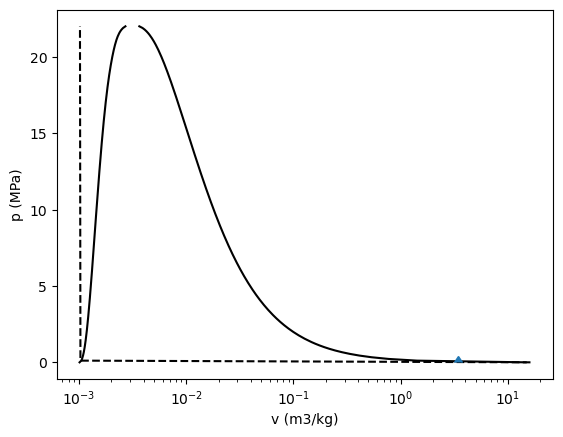

In [28]:
plt.figure()
plt.clf()
P = np.linspace(0.01, 22, 200) # range of pressures
for T in [T2_K]: #K
    steam = [th.state('Water', T=T, p=p*1e3) for p in P]
    # S = [s.s for s in steam]
    v = [s.v for s in steam]
    plt.xscale("log")
    plt.plot(v, P, 'k--')

vvap = [s.v for s in [th.state('Water', x=1, p=p*1e3) for p in P]]
vliq = [s.v for s in [th.state('Water', x=0, p=p*1e3) for p in P]]

plt.plot(vvap, P, 'k-')
plt.plot(vliq, P, 'k-')

plt.xscale("log")
plt.plot(v2,p2/1e3, marker = 10)

plt.xlabel('v (m3/kg)')
plt.ylabel('p (MPa)')
# plt.savefig('iawps-steam-p-v-diagram-2.png')

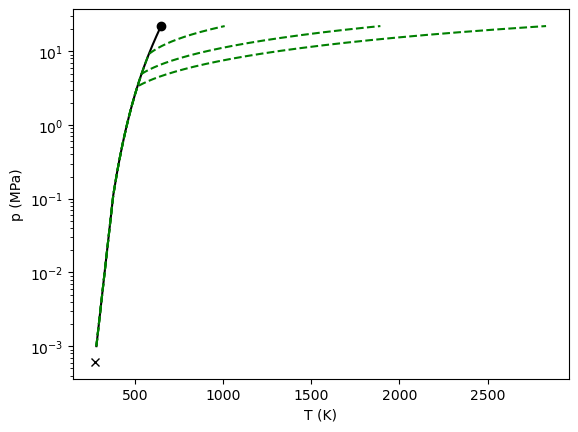

In [29]:
plt.figure()
plt.clf()
P = np.linspace(0.001, 22, 200) # range of pressures

Tvap = [s.T for s in [th.state('Water', x=1, p=p*1e3) for p in P]]
Tliq = [s.T for s in [th.state('Water', x=0, p=p*1e3) for p in P]]

plt.plot(Tvap, P, 'k-')
plt.yscale("log")

for V in [0.02,0.04,0.06]: #m3/kg
    steam = [th.state('water', p=(p,'Mpa'), v=V) for p in P]
    T = [s.T for s in steam]
    plt.plot(T, P, 'g--')
    plt.yscale("log")

Tc_K = 647.1 
pc_Pa = 22.1e6

Ttp_K = 273.16
ptp_Pa = 611.6

plt.plot(Tc_K,pc_Pa/1e6, marker = "o", color="black")
plt.plot(Ttp_K,ptp_Pa/1e6, marker = "x", color="black")

plt.xlabel('T (K)')
plt.ylabel('p (MPa)')
plt.savefig('iawps-steam-T-p-diagram.png')